In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [6]:
train_path = './dataset/train'
valid_path = './dataset/valid'

In [7]:
def PlotImage(img_arr):
  fig,axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(img_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()
    

In [8]:
training_datagen = ImageDataGenerator( rescale=1/255 , rotation_range=40 , width_shift_range=0.2 , height_shift_range=0.2 , shear_range=0.2 , zoom_range=0.2 , horizontal_flip=True , fill_mode='nearest' )

training_data= training_datagen.flow_from_directory(train_path , target_size=(200,200) , batch_size=128 , class_mode='binary' )

Found 3649 images belonging to 2 classes.


In [9]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [10]:
valid_datagen = ImageDataGenerator( rescale=1/255)

valid_data= training_datagen.flow_from_directory(valid_path , target_size=(200,200) , batch_size=128 , class_mode='binary' )

Found 806 images belonging to 2 classes.


D:\anaconda\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


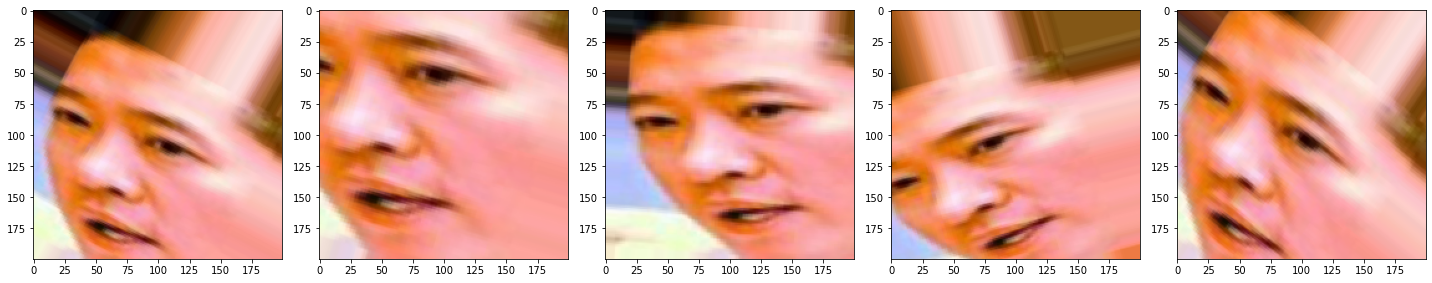

In [11]:
images = [ training_data[0][0][0] for i in range(5) ]
PlotImage(images)

In [12]:
model_save_path = 'face_mask_detection_model.h5'
checkpoint = ModelCheckpoint(model_save_path , monitor='val_accuracy' ,verbose=1 , save_best_only=True , mode='max')
callbacks_list = [checkpoint]

In [13]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [14]:
model.compile(optimizer= 'adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [16]:
history = model.fit(training_data ,
                    epochs=50 , 
                    verbose=1, 
                    validation_data= valid_data , callbacks = callbacks_list )

Epoch 1/50
29/29 [==============================] - ETA: 0s - loss: 0.7965 - accuracy: 0.6122
Epoch 1: val_accuracy improved from -inf to 0.85856, saving model to face_mask_detection_model.h5
29/29 [==============================] - 328s 11s/step - loss: 0.7965 - accuracy: 0.6122 - val_loss: 0.3861 - val_accuracy: 0.8586
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 0.3533 - accuracy: 0.8668
Epoch 2: val_accuracy improved from 0.85856 to 0.88089, saving model to face_mask_detection_model.h5
29/29 [==============================] - 302s 10s/step - loss: 0.3533 - accuracy: 0.8668 - val_loss: 0.3347 - val_accuracy: 0.8809
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 0.3003 - accuracy: 0.8896
Epoch 3: val_accuracy improved from 0.88089 to 0.91315, saving model to face_mask_detection_model.h5
29/29 [==============================] - 284s 10s/step - loss: 0.3003 - accuracy: 0.8896 - val_loss: 0.2562 - val_accuracy: 0.9132
Epoch 4/50
29/29 [=======

Epoch 29/50
29/29 [==============================] - ETA: 0s - loss: 0.1273 - accuracy: 0.9559
Epoch 29: val_accuracy did not improve from 0.95782
29/29 [==============================] - 272s 9s/step - loss: 0.1273 - accuracy: 0.9559 - val_loss: 0.1258 - val_accuracy: 0.9541
Epoch 30/50
29/29 [==============================] - ETA: 0s - loss: 0.1264 - accuracy: 0.9548
Epoch 30: val_accuracy did not improve from 0.95782
29/29 [==============================] - 281s 10s/step - loss: 0.1264 - accuracy: 0.9548 - val_loss: 0.1184 - val_accuracy: 0.9541
Epoch 31/50
29/29 [==============================] - ETA: 0s - loss: 0.1298 - accuracy: 0.9534
Epoch 31: val_accuracy did not improve from 0.95782
29/29 [==============================] - 257s 9s/step - loss: 0.1298 - accuracy: 0.9534 - val_loss: 0.1564 - val_accuracy: 0.9467
Epoch 32/50
29/29 [==============================] - ETA: 0s - loss: 0.1285 - accuracy: 0.9512
Epoch 32: val_accuracy did not improve from 0.95782
29/29 [==============

In [18]:
model.save("face_mask_detection_model.h5")